In [196]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from collections import Counter


In [197]:
rd=pd.read_csv("gender.csv")
df=pd.DataFrame(rd)
df.head()

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,1,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,2,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,3,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,4,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,5,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135


In [198]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Unnamed: 1,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135


In [199]:
Y=df['Unnamed: 1'].values 
df1=df.drop("Unnamed: 1",axis=1)
cov_matrix=df1.cov()
cov_matrix=np.array(cov_matrix)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


In [200]:

def trans(eigenvectors,d,df1):
    eigenvectors=eigenvectors[:d]
    df1=np.array(df1)
    New_data=np.dot(eigenvectors,df1.T)
    New_data=New_data.T
    return New_data

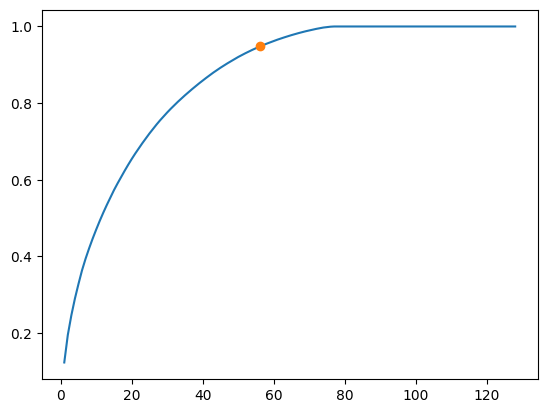

In [201]:
normalized_eigenvalues = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(normalized_eigenvalues)
cummualtive_sum=np.array(cumulative_variance)
componnets=np.array([i+1 for i in range(len(eigenvalues))])
x=np.min(np.where(cummualtive_sum>0.95))
plt.plot(componnets,cummualtive_sum)
plt.plot(x,0.95,'o')
plt.show()

In [202]:
df1=trans(eigenvectors,x,df1)
df1=pd.DataFrame(df1)
df1

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,-0.082477,-0.128955,0.171752,0.026992,0.031103,-0.055165,-0.187259,-0.097770,0.083485,-0.160032,...,0.144498,0.176376,0.089521,-0.042990,-0.135714,-0.221624,0.089785,0.054264,-0.080454,0.081634
1,-0.078123,-0.162944,0.171337,-0.090583,0.047866,-0.055385,-0.153435,-0.154645,0.097440,-0.216531,...,0.137727,0.158057,0.079923,-0.019166,-0.169732,-0.208325,0.077077,0.087992,-0.071586,0.147505
2,0.005472,-0.025757,0.228965,-0.093219,0.028340,-0.009670,-0.234815,-0.169995,-0.004063,-0.120295,...,0.036013,0.160870,0.092643,-0.071552,-0.091054,-0.133046,0.229001,0.056824,-0.125604,0.075450
3,-0.032246,-0.116483,0.163599,-0.109916,0.065923,-0.048351,-0.176142,-0.176671,0.147109,-0.133527,...,0.142308,0.059842,-0.023028,-0.064638,-0.149100,-0.263671,0.175808,0.166857,-0.100874,0.145156
4,-0.030303,-0.205463,0.169894,-0.003873,0.086318,-0.009797,-0.097663,-0.235010,0.121997,-0.178952,...,0.027129,0.108762,0.084287,-0.073272,-0.130181,-0.236122,0.083965,0.126094,-0.184746,0.114138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.148793,0.040290,0.229525,-0.097537,0.030559,0.020115,-0.167449,-0.070032,0.238211,-0.195298,...,0.126410,0.082450,0.052368,-0.039853,-0.047306,-0.110263,0.137575,0.029420,-0.106560,0.075432
796,-0.168408,0.047713,0.139096,-0.031243,0.093495,-0.154961,-0.115766,-0.110670,0.165082,-0.185795,...,0.043797,0.097083,0.081698,-0.045420,-0.159415,-0.170958,0.050155,0.159966,-0.232866,0.086646
797,-0.236484,0.008178,0.198294,-0.054519,0.068239,-0.019869,-0.176502,-0.096521,0.222887,-0.152884,...,0.051649,0.068486,0.136901,-0.132239,-0.075559,-0.079033,0.054061,0.045565,-0.161243,0.070906
798,-0.086565,-0.002991,0.175988,-0.073263,0.063950,-0.045265,-0.107853,-0.030878,0.209231,-0.174503,...,0.141547,0.057844,0.057230,-0.039907,-0.018289,-0.182855,0.137493,0.025365,-0.163416,0.097409


In [203]:
df2=df1[:10]
df_test=df2.add(df1[790:])
df_train=np.array(df1[10:790])
y2=list(Y[:10])
y3=list(Y[790:])
y_test=y2+y3
y_train=Y[10:790]


In [204]:
def knn_classify(features, labels, new_data_point, k):
    distances = [np.sqrt(np.sum((new_data_point - data_point) ** 2)) for data_point in features]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [labels[i] for i in k_indices]
    label_counts = Counter(k_nearest_labels)
    predicted_label = label_counts.most_common(1)[0][0]
    return predicted_label

def mea_acc(pred,test):
    sum=0
    leng=len(pred)
    for i,j in zip(pred,test):
        if(i==j):
            sum+=1
    return (sum/leng)*100
            

predictions=[]
k=int(input('Enter the k nearest neihbors\n'))
for i in df_test:
    predict=knn_classify(df_train,y_train,i,k)
    predictions.append(predict)
acc=mea_acc(predictions,y_test)
print("Accuracy:",acc)


Accuracy: 19.642857142857142
